In [46]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
import itertools # advanced tools
import plotly.graph_objects as go
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric
import seaborn as sns
from pprint import pprint
from sklearn import preprocessing
#Metrics Libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#Misc libraries
import warnings
warnings.filterwarnings("ignore")
# summarize the number of unique values for each column using numpy
from urllib.request import urlopen
from numpy import loadtxt
from numpy import unique
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import gc
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score


# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

from sklearn.neural_network import MLPClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import plot_confusion_matrix
# !pip install category_encoders
# import category_encoders as ce


import matplotlib.pyplot as plt


**Vissualization Data**

In [47]:
train_transaction = pd.read_csv('train_transaction.csv')
train_identity = pd.read_csv('train_identity.csv')

# Merging the transaction and identity dataset
train_data = train_transaction.merge(train_identity, how='left', on='TransactionID')
del train_transaction, train_identity

gc.collect()
train_data.head()

duplicate_rows = train_data[train_data.duplicated()]  
print("Duplicate Rows :", duplicate_rows)

train_data.dropna(axis=1,inplace=True) #drops rows with Nan.
print(train_data.head())

Duplicate Rows : Empty DataFrame
Columns: [TransactionID, isFraud, TransactionDT, TransactionAmt, ProductCD, card1, card2, card3, card4, card5, card6, addr1, addr2, dist1, dist2, P_emaildomain, R_emaildomain, C1, C2, C3, C4, C5, C6, C7, C8, C9, C10, C11, C12, C13, C14, D1, D2, D3, D4, D5, D6, D7, D8, D9, D10, D11, D12, D13, D14, D15, M1, M2, M3, M4, M5, M6, M7, M8, M9, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, V29, V30, V31, V32, V33, V34, V35, V36, V37, V38, V39, V40, V41, V42, V43, V44, V45, ...]
Index: []

[0 rows x 434 columns]
   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         

In [48]:
print(train_data.head()) # show first 5 rows
# indicating who many missing value (True means missing value)
train_data.isnull()
train_data.isnull().sum()

   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

    C1   C2   C3   C4  ...   V128  V129   V130   V131  V132    V133   V134  \
0  1.0  1.0  0.0  0.0  ...    0.0   0.0    0.0    0.0   0.0   117.0    0.0   
1  1.0  1.0  0.0  0.0  ...    0.0   0.0    0.0    0.0   0.0     0.0    0.0   
2  1.0  1.0  0.0  0.0  ...    0.0   0.0    0.0    0.0   0.0     0.0    0.0   
3  2.0  5.0  0.0  0.0  ...  925.0   0.0  354.0  135.0  50.0  1404.0  790.0   
4  1.0  1.0  0.0  0.0  ...    0.0   0.0    0.0    0.0   0.0     0.0    0.0   

   V135  V136  V137  
0   0.0   0.0   0.0  
1   0.0   0.0   0.0  
2 

TransactionID     0
isFraud           0
TransactionDT     0
TransactionAmt    0
ProductCD         0
                 ..
V133              0
V134              0
V135              0
V136              0
V137              0
Length: 64, dtype: int64

In [49]:
train_data.dropna(axis=1,inplace=True) #drops rows with Nan.
print(train_data.head())

   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

    C1   C2   C3   C4  ...   V128  V129   V130   V131  V132    V133   V134  \
0  1.0  1.0  0.0  0.0  ...    0.0   0.0    0.0    0.0   0.0   117.0    0.0   
1  1.0  1.0  0.0  0.0  ...    0.0   0.0    0.0    0.0   0.0     0.0    0.0   
2  1.0  1.0  0.0  0.0  ...    0.0   0.0    0.0    0.0   0.0     0.0    0.0   
3  2.0  5.0  0.0  0.0  ...  925.0   0.0  354.0  135.0  50.0  1404.0  790.0   
4  1.0  1.0  0.0  0.0  ...    0.0   0.0    0.0    0.0   0.0     0.0    0.0   

   V135  V136  V137  
0   0.0   0.0   0.0  
1   0.0   0.0   0.0  
2 

In [50]:
train_data.drop_duplicates() #Our Dataset does not contain duplicates
print(train_data.head())

   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

    C1   C2   C3   C4  ...   V128  V129   V130   V131  V132    V133   V134  \
0  1.0  1.0  0.0  0.0  ...    0.0   0.0    0.0    0.0   0.0   117.0    0.0   
1  1.0  1.0  0.0  0.0  ...    0.0   0.0    0.0    0.0   0.0     0.0    0.0   
2  1.0  1.0  0.0  0.0  ...    0.0   0.0    0.0    0.0   0.0     0.0    0.0   
3  2.0  5.0  0.0  0.0  ...  925.0   0.0  354.0  135.0  50.0  1404.0  790.0   
4  1.0  1.0  0.0  0.0  ...    0.0   0.0    0.0    0.0   0.0     0.0    0.0   

   V135  V136  V137  
0   0.0   0.0   0.0  
1   0.0   0.0   0.0  
2 

0    13408
1      380
Name: isFraud, dtype: int64
0    0.97244
1    0.02756
Name: isFraud, dtype: float64


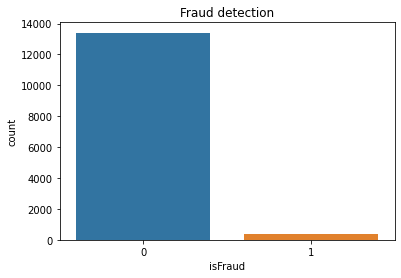

In [51]:
print(train_data['isFraud'].value_counts())

# Print the proportions of each category
print(train_data['isFraud'].value_counts(normalize=True))

# Visualize the Categories
sns.countplot(train_data['isFraud'])
plt.title("Fraud detection")
plt.show()

In [52]:
# # reading the database
  
# # Bar chart with day against tip
# # hostogram of total_bills
# # plt.hist(train_data['card4'])
  
# # plt.title("Histogram for card4 feature")
  
# # Adding the legends
# plt.show()

In [53]:
# # reading the database
  
# # Bar chart with day against tip
# # hostogram of total_bills
# plt.hist(train_data['card6'])
  
# plt.title("Histogram for card6 feature")
  
# # Adding the legends
# plt.show()

In [57]:
inputs_df = train_data.drop('ProductCD', axis=1)
# inputs_df1 = inputs_df.drop('card4', axis=1)
# inputs_df2 = inputs_df1.drop('card6', axis=1)
# inputs_df2.head()

In [55]:
y=train_data['isFraud']
train_data.drop(columns='isFraud')
x=train_data

In [58]:
X_train, X_test, y_train, y_test = train_test_split(inputs_df,y, test_size=0.37, random_state=30, stratify=y)

**Visualization DataSet**

In [59]:
# ds.plot.scatter(x='letter', y='height', title='Letter-Recognition Dataset')

In [60]:
# ds['letter'].value_counts().sort_index().plot.bar()

**Pre processing**

In [64]:
# X_train, X_test, y_train, y_test = train_test_split(ds.drop('letter', axis=1), ds['letter'], test_size=0.3)
# print('X_train: ', X_train)
# print('Y_train: ', y_train)
# print('X_test: ', X_test)
# print('Y_test: ', y_test)

In [61]:
modelSgd = MLPClassifier(hidden_layer_sizes=(150,100,50), activation='relu', solver='sgd', max_iter=300)
modelSgd.fit(X_train, y_train)
print(classification_report(y_test, modelSgd.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      4961
           1       0.00      0.00      0.00       141

    accuracy                           0.97      5102
   macro avg       0.49      0.50      0.49      5102
weighted avg       0.95      0.97      0.96      5102



In [62]:
modelAdam = MLPClassifier(hidden_layer_sizes=(250,250, 250), activation='relu', solver='adam', max_iter=2000)
modelAdam.fit(X_train, y_train)
print(classification_report(y_test, modelAdam.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      4961
           1       0.00      0.00      0.00       141

    accuracy                           0.97      5102
   macro avg       0.49      0.50      0.49      5102
weighted avg       0.95      0.97      0.96      5102



In [63]:
modelAdam = MLPClassifier(hidden_layer_sizes=(200,200, 200), activation='logistic', solver='adam', max_iter=2000)
modelAdam.fit(X_train, y_train)
print(classification_report(y_test, modelAdam.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      4961
           1       0.00      0.00      0.00       141

    accuracy                           0.97      5102
   macro avg       0.49      0.50      0.49      5102
weighted avg       0.95      0.97      0.96      5102

